In [1]:
from abel.classes.collider.preset.pwfa_collider import PWFACollider
from abel import Collider
%load_ext autoreload
%autoreload 2

## PWFA Collider

In [2]:
pwfa_collider = PWFACollider()
pwfa_collider.run('pwfa_collider_example', overwrite=True)

>> LINAC #1
Tracked #0  SourceBasic             (s =    3.2 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  1.0%, ε =   1.0/1.0 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  249.4 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #2  StageBasic #1           (s =  405.7 m) :   E = 161.2 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #3  InterstageBasic         (s =  428.4 m) :   E = 161.2 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #4  StageBasic #2           (s =  584.6 m) :   E = 317.5 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #5  InterstageBasic         (s =  616.8 m) :   E = 317.5 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #6  StageBasic #3           (s =  773.0 m) :   E = 473.7 GeV, Q = -1.60 nC, σz =  17.7 µm, σE =  0.0%, ε =   1.0/1.0 mm-mrad
    ... #7  InterstageBasic         (s =  812.3 m) :   E 

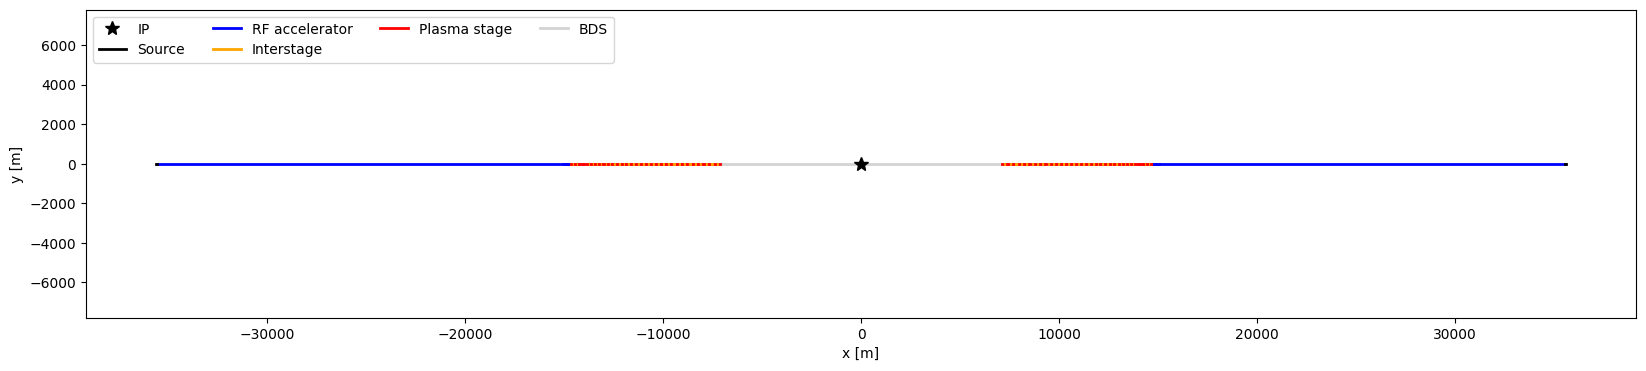

In [3]:
pwfa_collider.plot_survey()

In [4]:
pwfa_collider.print_cost()

-- COSTS -----------------------------------------
-- Construction: 21888 MILCU
   -- Plasma linac: 10852 MILCU
      -- Polarized electron source: 96 MILCU
      -- RF injector: 72 MILCU
         -- Instrumented beamline (25%): 2 MILCU
         -- RF structures (74x): 21 MILCU
         -- Klystrons (74x, 9 MW peak, 22 kW avg): 48 MILCU
      -- Driver complex: 8734 MILCU
         -- Source: 50 MILCU
         -- RF accelerator: 7435 MILCU
            -- Instrumented beamline (25%): 210 MILCU
            -- RF structures (6785x): 1793 MILCU
            -- Klystrons (6786x, 28 MW peak, 60 kW avg): 5432 MILCU
         -- Civil construction: 1248 MILCU
      -- Plasma stages (32x): 507 MILCU
      -- Interstages: 254 MILCU
      -- BDS: 288 MILCU
      -- Civil construction: 902 MILCU
   -- Plasma linac: 10852 MILCU
      -- Polarized electron source: 96 MILCU
      -- RF injector: 72 MILCU
         -- Instrumented beamline (25%): 2 MILCU
         -- RF structures (74x): 21 MILCU
         

In [5]:
pwfa_collider = PWFACollider()
best_parameters, best_values = pwfa_collider.optimize('pwfa_collider_optimization', 
                    parameters=[
                        #{'name': 'num_bunches_in_train', 'type': 'range', 'value_type': 'int', 'bounds': [100, 200], 'log_scale': True},
                        #{'name': 'rep_rate_trains', 'type': 'range', 'value_type': 'float', 'bounds': [50, 200], 'log_scale': True},
                        {'name': 'driver_separation_num_buckets', 'type': 'range', 'value_type': 'int', 'bounds': [2, 7]},
                        {'name': 'driver_linac_num_structures_per_klystron', 'type': 'range', 'value_type': 'float', 'bounds': [0.5, 2.0], 'log_scale': True},
                        {'name': 'driver_linac_gradient', 'type': 'range', 'value_type': 'float', 'bounds': [1e6, 8e6], 'log_scale': True},
                        {'name': 'pwfa_num_stages', 'type': 'range', 'value_type': 'int', 'bounds': [10, 100], 'log_scale': True}
                    ], 
                    merit_fcn=Collider.full_programme_cost, label='Collider cost',
                    num_shots_per_step=1, num_steps=50,
                    parallel=False, overwrite=True, verbose=False)

/Users/carlal/UiO/Code/venvs/pyvenv/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
[INFO 10-28 19:48:11] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='driver_separation_num_buckets', parameter_type=INT, range=[2, 7]), RangeParameter(name='driver_linac_num_structures_per_klystron', parameter_type=FLOAT, range=[0.5, 2.0], log_scale=True), RangeParameter(name='driver_linac_gradient', parameter_type=FLOAT, range=[1000000.0, 8000000.0], log_scale=True), RangeParameter(name='pwfa_

Merit function (Collider cost): 8.48e+10
>> driver_separation_num_buckets: 2
>> driver_linac_num_structures_per_klystron: 0.625
>> driver_linac_gradient: 6.92e+06
>> pwfa_num_stages: 27


[INFO 10-28 19:48:14] ax.service.managed_loop: Running optimization trial 3...


Merit function (Collider cost): 5.41e+10
>> driver_separation_num_buckets: 3
>> driver_linac_num_structures_per_klystron: 0.597
>> driver_linac_gradient: 4.13e+06
>> pwfa_num_stages: 21


[INFO 10-28 19:48:16] ax.service.managed_loop: Running optimization trial 4...


Merit function (Collider cost): 1.17e+11
>> driver_separation_num_buckets: 7
>> driver_linac_num_structures_per_klystron: 1.53
>> driver_linac_gradient: 1.02e+06
>> pwfa_num_stages: 22


[INFO 10-28 19:48:19] ax.service.managed_loop: Running optimization trial 5...


Merit function (Collider cost): 3.73e+10
>> driver_separation_num_buckets: 5
>> driver_linac_num_structures_per_klystron: 0.672
>> driver_linac_gradient: 2.66e+06
>> pwfa_num_stages: 57


[INFO 10-28 19:48:21] ax.service.managed_loop: Running optimization trial 6...


Merit function (Collider cost): 8.31e+10
>> driver_separation_num_buckets: 7
>> driver_linac_num_structures_per_klystron: 0.597
>> driver_linac_gradient: 1.64e+06
>> pwfa_num_stages: 26


[INFO 10-28 19:48:26] ax.service.managed_loop: Running optimization trial 7...


Merit function (Collider cost): 3.16e+10
>> driver_separation_num_buckets: 3
>> driver_linac_num_structures_per_klystron: 0.565
>> driver_linac_gradient: 3.17e+06
>> pwfa_num_stages: 74


[INFO 10-28 19:48:29] ax.service.managed_loop: Running optimization trial 8...


Merit function (Collider cost): 6.12e+10
>> driver_separation_num_buckets: 4
>> driver_linac_num_structures_per_klystron: 1.27
>> driver_linac_gradient: 1.57e+06
>> pwfa_num_stages: 37


[INFO 10-28 19:48:30] ax.service.managed_loop: Running optimization trial 9...


Merit function (Collider cost): 1.3e+11
>> driver_separation_num_buckets: 2
>> driver_linac_num_structures_per_klystron: 1.08
>> driver_linac_gradient: 4.18e+06
>> pwfa_num_stages: 18


[INFO 10-28 19:48:35] ax.service.managed_loop: Running optimization trial 10...


Merit function (Collider cost): 4.5e+10
>> driver_separation_num_buckets: 4
>> driver_linac_num_structures_per_klystron: 0.535
>> driver_linac_gradient: 2.83e+06
>> pwfa_num_stages: 47


[INFO 10-28 19:48:42] ax.service.managed_loop: Running optimization trial 11...


Merit function (Collider cost): 3.19e+10
>> driver_separation_num_buckets: 4
>> driver_linac_num_structures_per_klystron: 0.703
>> driver_linac_gradient: 2.46e+06
>> pwfa_num_stages: 83


[INFO 10-28 19:48:49] ax.service.managed_loop: Running optimization trial 12...


Merit function (Collider cost): 2.56e+10
>> driver_separation_num_buckets: 4
>> driver_linac_num_structures_per_klystron: 0.644
>> driver_linac_gradient: 3.66e+06
>> pwfa_num_stages: 93


[INFO 10-28 19:48:57] ax.service.managed_loop: Running optimization trial 13...


Merit function (Collider cost): 2.84e+10
>> driver_separation_num_buckets: 4
>> driver_linac_num_structures_per_klystron: 0.57
>> driver_linac_gradient: 2.99e+06
>> pwfa_num_stages: 100


[INFO 10-28 19:49:06] ax.service.managed_loop: Running optimization trial 14...


Merit function (Collider cost): 2.51e+10
>> driver_separation_num_buckets: 5
>> driver_linac_num_structures_per_klystron: 0.741
>> driver_linac_gradient: 3.45e+06
>> pwfa_num_stages: 100



KeyboardInterrupt



In [ ]:
print(best_parameters)

In [ ]:
pwfa_collider = PWFACollider()
pwfa_collider.set_parameters(best_parameters)
pwfa_collider.run('pwfa_collider_example_opt', overwrite=True, verbose=False)
pwfa_collider.plot_survey()
pwfa_collider.print_cost()
pwfa_collider.print_power()